In [1]:
from os import chdir
chdir('/home/jovyan')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_clean = pd.read_pickle("bin/corpus.pkl")

data = pd.read_pickle("bin/dtm.pkl")
data = data.transpose()
data.columns = ["count"]
data.head()

,count
00,2
0104,1
0195713c8e65088650fdd8b599db377b7ce6c9b10bd13766,1
02,2
04,2


In [4]:
top_df = data.sort_values(by="count", ascending=False).head(100)
top_df.head()

,count
kubernetes,769
cluster,463
kubectl,429
pod,423
service,343


In [5]:
add_stop_words = [
    "image",
    "using",
    "chapter",
    "10",
    "use",
    "figure",
    "note",
    "com"    
]

In [6]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# union with a set of top words provided by sklearn
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words="english")
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

import pickle
pickle.dump(cv, open("bin/cv_stop.pkl", "wb"))
data_stop.to_pickle("bin/dtm_stop.pkl")

In [7]:
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

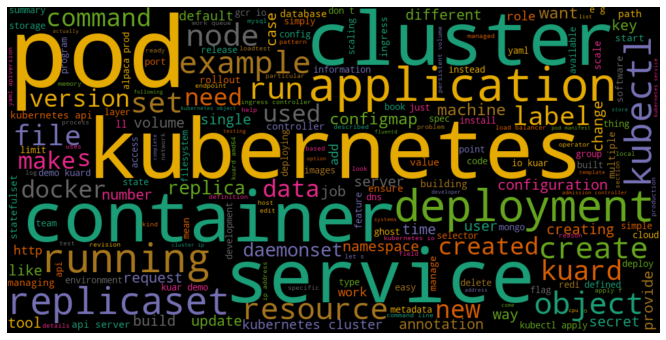

In [8]:
wc = WordCloud(
    width=1000, height=500,
    stopwords=stop_words,
    background_color="black", colormap="Dark2",
    max_font_size=150, random_state=42)

wc.generate(data_clean.transcript.values[0])

plt.figure(figsize=(16, 6))
plt.imshow(wc, interpolation="bilinear", )
plt.axis("off")
plt.show()